C:\Users\Jiqua\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Jiqua\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Jiqua\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


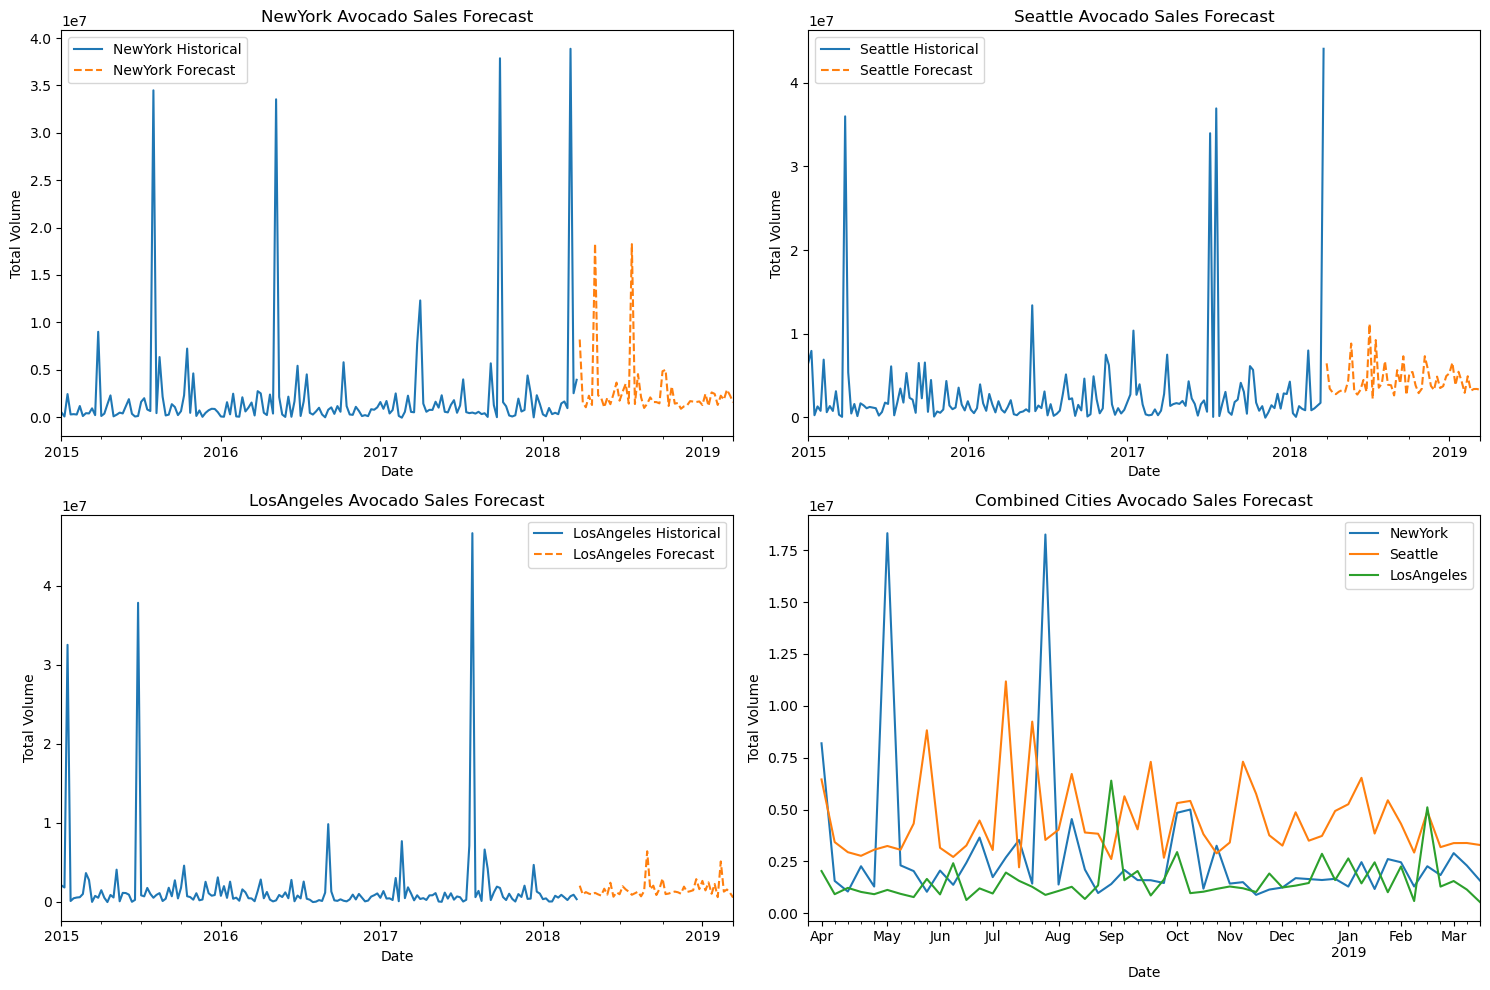

52-Week Forecast Summary:

NewYork Forecast:
Minimum expected volume: 886229.16
Maximum expected volume: 18321829.03
Average expected volume: 2847610.39

Seattle Forecast:
Minimum expected volume: 2214944.09
Maximum expected volume: 11176449.71
Average expected volume: 4504723.66

LosAngeles Forecast:
Minimum expected volume: 538072.10
Maximum expected volume: 6391607.32
Average expected volume: 1555055.30


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read the data
df = pd.read_csv('Downloads/Augmented_avocado.csv', parse_dates=['Date'])

# Filter for organic avocados and specific cities
organic_df = df[df['type'] == 'organic']
cities = ['NewYork', 'Seattle', 'LosAngeles']

# Prepare the forecast function
def forecast_city_sales(city_data):
    # Aggregate daily data to weekly
    weekly_data = city_data.groupby(pd.Grouper(key='Date', freq='W'))['Total Volume'].sum().reset_index()
    weekly_data.set_index('Date', inplace=True)
    
    # Fill missing values
    weekly_data = weekly_data.resample('W').sum()
    weekly_data.fillna(weekly_data.mean(), inplace=True)
    
    model = ExponentialSmoothing(
        weekly_data['Total Volume'], 
        trend='add', 
        seasonal='add', 
        seasonal_periods=52
    ).fit()
    
    # Forecast next 52 weeks
    forecast = model.forecast(52)
    return weekly_data, forecast

# Prepare figure for individual city plots
plt.figure(figsize=(15, 10))

# Store forecasts for combined plot
all_forecasts = {}

# Forecast and plot for each city
for i, city in enumerate(cities, 1):
    # Filter data for the specific city
    city_data = organic_df[organic_df['region'] == city]
    
    # Ensure data is sorted by date
    city_data = city_data.sort_values('Date')
    
    # Perform forecast
    historical_data, forecast = forecast_city_sales(city_data)
    
    # Store forecast
    all_forecasts[city] = forecast
    
    # Plot historical and forecasted data
    plt.subplot(2, 2, i)
    historical_data['Total Volume'].plot(label=f'{city} Historical')
    pd.Series(forecast, index=pd.date_range(start='2018-03-25', periods=52, freq='W')).plot(
        label=f'{city} Forecast', linestyle='--'
    )
    plt.title(f'{city} Avocado Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Total Volume')
    plt.legend()

# Combined forecast plot
plt.subplot(2, 2, 4)
for city, forecast in all_forecasts.items():
    pd.Series(forecast, index=pd.date_range(start='2018-03-25', periods=52, freq='W')).plot(label=city)
plt.title('Combined Cities Avocado Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.legend()

plt.tight_layout()
plt.show()

# Print out forecast summary
print("52-Week Forecast Summary:")
for city, forecast in all_forecasts.items():
    print(f"\n{city} Forecast:")
    print(f"Minimum expected volume: {forecast.min():.2f}")
    print(f"Maximum expected volume: {forecast.max():.2f}")
    print(f"Average expected volume: {forecast.mean():.2f}")

Forecast insights for each city:

New York:
The historical data shows significant volatility in sales volumes, with large peaks and valleys throughout the years.
The forecast predicts continued volatility, with a wide range between the minimum and maximum expected volumes. This suggests the New York avocado market is highly unpredictable.
The average expected volume for New York is around 2.85 million units, but the forecast indicates the actual volumes could range from around 0.9 million to over 18 million units.

Seattle:
The historical data for Seattle shows less pronounced peaks and valleys compared to New York, indicating a more stable market.
The forecast predicts a more consistent pattern of avocado sales in Seattle, with a narrower range between the minimum and maximum expected volumes.
The average expected volume for Seattle is around 4.5 million units, with a minimum of around 2.2 million and a maximum of 11.2 million.It has a more moderate range between minimum and maximum volumes, indicating a more predictable demand.

Los Angeles:
The historical data shows fluctuations in sales volumes, with some notable peaks and valleys.
The forecast predicts a continuation of this volatility, with expected volumes ranging from around 0.5 million to 6.4 million units.
The average expected volume for Los Angeles is approximately 1.6 million units.
Los Angeles shows the lowest overall avocado sales volume, with significant but less extreme variations compared to New York.

Key Comparative Insights:

Seattle leads in consistent avocado sales volume
New York has the most unpredictable market
Los Angeles has the lowest overall sales volumes

Potential Business Implications:

Seattle might be the most reliable market for consistent avocado sales
New York presents both highest risk and highest potential reward
Los Angeles might require more targeted marketing or inventory strategies

Focus sales efforts and distribution resources on the New York market, which shows the highest overall volume potential but also the greatest volatility.
Leverage the stable, predictable demand in Seattle to establish reliable revenue streams and maintain consistent service levels.
Explore opportunities to grow market share in Los Angeles by implementing targeted marketing campaigns and optimizing the supply chain to better serve this region.